# Hook callbacks

This provides both a standalone class and a callback for registering and automatically deregistering [PyTorch hooks](https://pytorch.org/tutorials/beginner/former_torchies/nn_tutorial.html#forward-and-backward-function-hooks), along with some pre-defined hooks. Hooks can be attached to any [`nn.Module`](https://pytorch.org/docs/stable/nn.html#torch.nn.Module), for either the forward or the backward pass.

We'll start by looking at the pre-defined hook [`ActivationStats`](/callbacks.hooks.html#ActivationStats), then we'll see how to create our own.

In [ ]:
from fastai.gen_doc.nbdoc import *
from fastai.callbacks.hooks import * 
from fastai import *
from fastai.train import *
from fastai.vision import *

In [ ]:
show_doc(ActivationStats)

<h2 id="ActivationStats"><code>class</code> <code>ActivationStats</code><a href="https://github.com/fastai/fastai/blob/master/fastai/callbacks/hooks.py#L82" class="source_link">[source]</a></h2>

> <code>ActivationStats</code>(`learn`:[`Learner`](/basic_train.html#Learner), `modules`:`Sequence`\[[`Module`](https://pytorch.org/docs/stable/nn.html#torch.nn.Module)\]=`None`, `do_remove`:`bool`=`True`) :: [`HookCallback`](/callbacks.hooks.html#HookCallback)

Callback that record the mean and std of activations.  

[`ActivationStats`](/callbacks.hooks.html#ActivationStats) saves the layer activations in `self.stats` for all `modules` passed to it. By default it will save activations for *all* modules. For instance:

In [ ]:
path = untar_data(URLs.MNIST_SAMPLE)
data = ImageDataBunch.from_folder(path)
#learn = create_cnn(data, models.resnet18, callback_fns=ActivationStats)
learn = Learner(data, simple_cnn((3,16,16,2)), callback_fns=ActivationStats)
learn.fit(1)

epoch,train_loss,valid_loss
1,0.123089,0.109827


The saved `stats` is a `FloatTensor` of shape `(2,num_modules,num_batches)`. The first axis is `(mean,stdev)`.

In [ ]:
len(learn.data.train_dl),len(learn.activation_stats.modules)

(193, 3)

In [ ]:
learn.activation_stats.stats.shape

torch.Size([2, 3, 193])

So this shows the standard deviation (`axis0==1`) of 2th last layer (`axis1==-2`) for each batch (`axis2`):

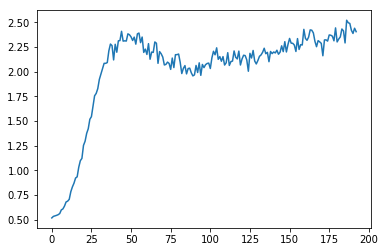

In [ ]:
plt.plot(learn.activation_stats.stats[1][-2].numpy());

### Internal implementation

In [ ]:
show_doc(ActivationStats.hook)

<h4 id="ActivationStats.hook"><code>hook</code><a href="https://github.com/fastai/fastai/blob/master/fastai/callbacks/hooks.py#L90" class="source_link">[source]</a></h4>

> <code>hook</code>(`m`:[`Module`](https://pytorch.org/docs/stable/nn.html#torch.nn.Module), `i`:`Tensors`, `o`:`Tensors`) → `Tuple`\[`Rank0Tensor`, `Rank0Tensor`\]

Take the mean and std of `o`.  

### Callback methods

You don't call these yourself - they're called by fastai's [`Callback`](/callback.html#Callback) system automatically to enable the class's functionality.

In [ ]:
show_doc(ActivationStats.on_train_begin)

<h4 id="ActivationStats.on_train_begin"><code>on_train_begin</code><a href="https://github.com/fastai/fastai/blob/master/fastai/callbacks/hooks.py#L85" class="source_link">[source]</a></h4>

> <code>on_train_begin</code>(`kwargs`)

Initialize stats.  

In [ ]:
show_doc(ActivationStats.on_batch_end)

<h4 id="ActivationStats.on_batch_end"><code>on_batch_end</code><a href="https://github.com/fastai/fastai/blob/master/fastai/callbacks/hooks.py#L93" class="source_link">[source]</a></h4>

> <code>on_batch_end</code>(`train`, `kwargs`)

Take the stored results and puts it in `self.stats`  

In [ ]:
show_doc(ActivationStats.on_train_end)

<h4 id="ActivationStats.on_train_end"><code>on_train_end</code><a href="https://github.com/fastai/fastai/blob/master/fastai/callbacks/hooks.py#L96" class="source_link">[source]</a></h4>

> <code>on_train_end</code>(`kwargs`)

Polish the final result.  

In [ ]:
show_doc(Hook)

<h2 id="Hook"><code>class</code> <code>Hook</code><a href="https://github.com/fastai/fastai/blob/master/fastai/callbacks/hooks.py#L10" class="source_link">[source]</a></h2>

> <code>Hook</code>(`m`:[`Module`](https://pytorch.org/docs/stable/nn.html#torch.nn.Module), `hook_func`:`HookFunc`, `is_forward`:`bool`=`True`, `detach`:`bool`=`True`)

Create a hook on `m` with `hook_func`.  

Registers and manually deregisters a [PyTorch hook](https://pytorch.org/tutorials/beginner/former_torchies/nn_tutorial.html#forward-and-backward-function-hooks). Your `hook_func` will be called automatically when forward/backward (depending on `is_forward`) for your module `m` is run, and the result of that function is placed in `self.stored`.

In [ ]:
show_doc(Hook.remove)

<h4 id="Hook.remove"><code>remove</code><a href="https://github.com/fastai/fastai/blob/master/fastai/callbacks/hooks.py#L25" class="source_link">[source]</a></h4>

> <code>remove</code>()

Remove the hook from the model.  

Deregister the hook, if not called already.

In [ ]:
show_doc(Hooks)

<h2 id="Hooks"><code>class</code> <code>Hooks</code><a href="https://github.com/fastai/fastai/blob/master/fastai/callbacks/hooks.py#L34" class="source_link">[source]</a></h2>

> <code>Hooks</code>(`ms`:`ModuleList`, `hook_func`:`HookFunc`, `is_forward`:`bool`=`True`, `detach`:`bool`=`True`)

Create several hooks on the modules in `ms` with `hook_func`.  

Acts as a `Collection` (i.e. `len(hooks)` and `hooks[i]`) and an `Iterator` (i.e. `for hook in hooks`) of a group of hooks, one for each module in `ms`, with the ability to remove all as a group. Use `stored` to get all hook results. `hook_func` and `is_forward` behavior is the same as [`Hook`](/callbacks.hooks.html#Hook). See the source code for [`HookCallback`](/callbacks.hooks.html#HookCallback) for a simple example.

In [ ]:
show_doc(Hooks.remove)

<h4 id="Hooks.remove"><code>remove</code><a href="https://github.com/fastai/fastai/blob/master/fastai/callbacks/hooks.py#L45" class="source_link">[source]</a></h4>

> <code>remove</code>()

Remove the hooks from the model.  

Deregister all hooks created by this class, if not previously called.

## Convenience functions for hooks

In [ ]:
show_doc(hook_output)

<h4 id="hook_output"><code>hook_output</code><a href="https://github.com/fastai/fastai/blob/master/fastai/callbacks/hooks.py#L54" class="source_link">[source]</a></h4>

> <code>hook_output</code>(`module`:[`Module`](https://pytorch.org/docs/stable/nn.html#torch.nn.Module), `detach`:`bool`=`True`, `grad`:`bool`=`False`) → [`Hook`](/callbacks.hooks.html#Hook)

Return a [`Hook`](/callbacks.hooks.html#Hook) that stores activations of `module` in `self.stored`  

Function that creates a [`Hook`](/callbacks.hooks.html#Hook) for `module` that simply stores the output of the layer.

In [ ]:
show_doc(hook_outputs)

<h4 id="hook_outputs"><code>hook_outputs</code><a href="https://github.com/fastai/fastai/blob/master/fastai/callbacks/hooks.py#L58" class="source_link">[source]</a></h4>

> <code>hook_outputs</code>(`modules`:`ModuleList`, `detach`:`bool`=`True`, `grad`:`bool`=`False`) → [`Hooks`](/callbacks.hooks.html#Hooks)

Return [`Hooks`](/callbacks.hooks.html#Hooks) that store activations of all `modules` in `self.stored`  

Function that creates a [`Hook`](/callbacks.hooks.html#Hook) for all passed `modules` that simply stores the output of the layers. For example, the (slightly simplified) source code of [`model_sizes`](/callbacks.hooks.html#model_sizes) is:

```python
def model_sizes(m, size):
    x = m(torch.zeros(1, in_channels(m), *size))
    return [o.stored.shape for o in hook_outputs(m)]
```

In [ ]:
show_doc(model_sizes)

<h4 id="model_sizes"><code>model_sizes</code><a href="https://github.com/fastai/fastai/blob/master/fastai/callbacks/hooks.py#L109" class="source_link">[source]</a></h4>

> <code>model_sizes</code>(`m`:[`Module`](https://pytorch.org/docs/stable/nn.html#torch.nn.Module), `size`:`tuple`=`(64, 64)`) → `Tuple`\[`Sizes`, `Tensor`, [`Hooks`](/callbacks.hooks.html#Hooks)\]

Pass a dummy input through the model `m` to get the various sizes of activations.  

In [ ]:
show_doc(model_summary)

<h4 id="model_summary"><code>model_summary</code><a href="https://github.com/fastai/fastai/blob/master/fastai/callbacks/hooks.py#L158" class="source_link">[source]</a></h4>

> <code>model_summary</code>(`m`:`ModuleList`, `n`:`int`=`70`)

Print a summary of `m` using a output text width of `n` chars  

In [ ]:
show_doc(num_features_model)

<h4 id="num_features_model"><code>num_features_model</code><a href="https://github.com/fastai/fastai/blob/master/fastai/callbacks/hooks.py#L115" class="source_link">[source]</a></h4>

> <code>num_features_model</code>(`m`:[`Module`](https://pytorch.org/docs/stable/nn.html#torch.nn.Module)) → `int`

Return the number of output features for `model`.  

It can be useful to get the size of each layer of a model (e.g. for printing a summary, or for generating cross-connections for a [`DynamicUnet`](/vision.models.unet.html#DynamicUnet)), however they depend on the size of the input. This function calculates the layer sizes by passing in a minimal tensor of `size`.

In [ ]:
show_doc(dummy_batch)

<h4 id="dummy_batch"><code>dummy_batch</code><a href="https://github.com/fastai/fastai/blob/master/fastai/callbacks/hooks.py#L100" class="source_link">[source]</a></h4>

> <code>dummy_batch</code>(`m`:[`Module`](https://pytorch.org/docs/stable/nn.html#torch.nn.Module), `size`:`tuple`=`(64, 64)`) → `Tensor`

Create a dummy batch to go through `m` with `size`.  

In [ ]:
show_doc(dummy_eval)

<h4 id="dummy_eval"><code>dummy_eval</code><a href="https://github.com/fastai/fastai/blob/master/fastai/callbacks/hooks.py#L105" class="source_link">[source]</a></h4>

> <code>dummy_eval</code>(`m`:[`Module`](https://pytorch.org/docs/stable/nn.html#torch.nn.Module), `size`:`tuple`=`(64, 64)`)

Pass a [`dummy_batch`](/callbacks.hooks.html#dummy_batch) in evaluation mode in `m` with `size`.  

In [ ]:
show_doc(HookCallback)

<h2 id="HookCallback"><code>class</code> <code>HookCallback</code><a href="https://github.com/fastai/fastai/blob/master/fastai/callbacks/hooks.py#L62" class="source_link">[source]</a></h2>

> <code>HookCallback</code>(`learn`:[`Learner`](/basic_train.html#Learner), `modules`:`Sequence`\[[`Module`](https://pytorch.org/docs/stable/nn.html#torch.nn.Module)\]=`None`, `do_remove`:`bool`=`True`) :: [`LearnerCallback`](/basic_train.html#LearnerCallback)

Callback that can be used to register hooks on `modules`. Implement the corresponding function in `self.hook`.  

For all `modules`, uses a callback to automatically register a method `self.hook` (that you must define in an inherited class) as a hook. This method must have the signature:

```python
def hook(self, m:Model, input:Tensors, output:Tensors)
```

If `do_remove` then the hook is automatically deregistered at the end of training. See [`ActivationStats`](/callbacks.hooks.html#ActivationStats) for a simple example of inheriting from this class.

### Callback methods

You don't call these yourself - they're called by fastai's [`Callback`](/callback.html#Callback) system automatically to enable the class's functionality.

In [ ]:
show_doc(HookCallback.on_train_begin)

<h4 id="HookCallback.on_train_begin"><code>on_train_begin</code><a href="https://github.com/fastai/fastai/blob/master/fastai/callbacks/hooks.py#L68" class="source_link">[source]</a></h4>

> <code>on_train_begin</code>(`kwargs`)

Register the [`Hooks`](/callbacks.hooks.html#Hooks) on `self.modules`.  

In [ ]:
show_doc(HookCallback.on_train_end)

<h4 id="HookCallback.on_train_end"><code>on_train_end</code><a href="https://github.com/fastai/fastai/blob/master/fastai/callbacks/hooks.py#L75" class="source_link">[source]</a></h4>

> <code>on_train_end</code>(`kwargs`)

Remove the [`Hooks`](/callbacks.hooks.html#Hooks).  

## Undocumented Methods - Methods moved below this line will intentionally be hidden

In [ ]:
show_doc(HookCallback.remove)

<h4 id="HookCallback.remove"><code>remove</code><a href="https://github.com/fastai/fastai/blob/master/fastai/callbacks/hooks.py#L79" class="source_link">[source]</a></h4>

> <code>remove</code>()

In [ ]:
show_doc(Hook.hook_fn)

<h4 id="Hook.hook_fn"><code>hook_fn</code><a href="https://github.com/fastai/fastai/blob/master/fastai/callbacks/hooks.py#L18" class="source_link">[source]</a></h4>

> <code>hook_fn</code>(`module`:[`Module`](https://pytorch.org/docs/stable/nn.html#torch.nn.Module), `input`:`Tensors`, `output`:`Tensors`)

Applies `hook_func` to `module`, `input`, `output`.  

## New Methods - Please document or move to the undocumented section